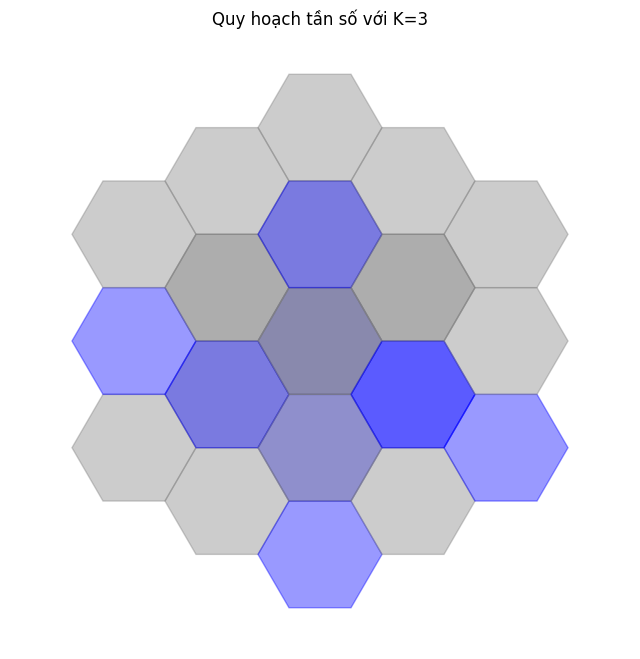

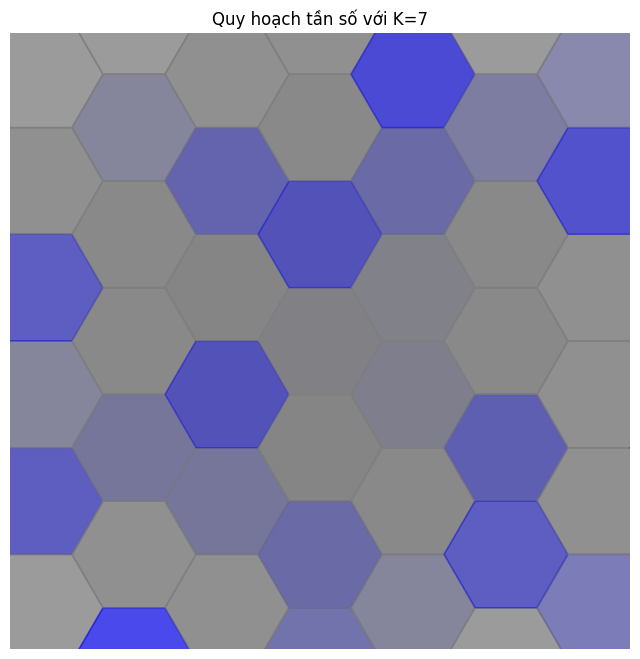

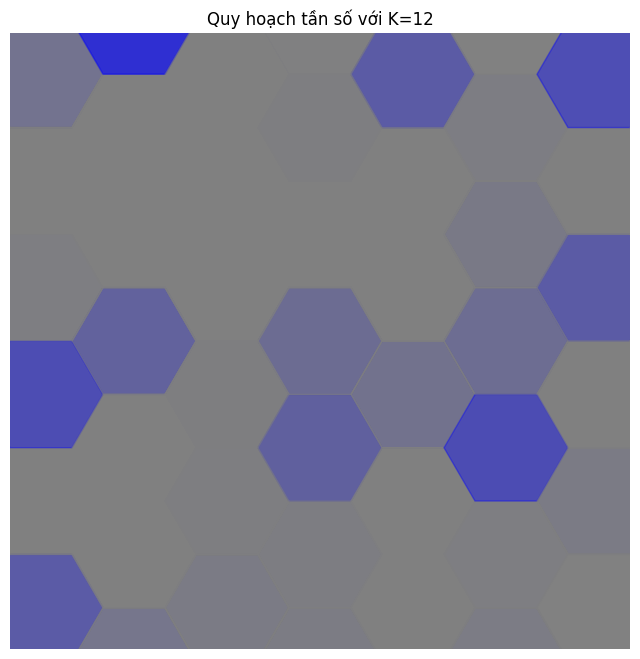

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def hexagon(x, y, size, color='b', label=None):
    """Vẽ một tế bào hình lục giác với tâm (x, y) và kích thước size."""
    angles = np.linspace(0, 2 * np.pi, 7)
    x_hex = x + size * np.cos(angles)
    y_hex = y + size * np.sin(angles)
    plt.fill(x_hex, y_hex, color=color, alpha=0.4, label=label)

def plot_cell_layout(K, radius=1.5):
    """Vẽ sơ đồ quy hoạch tần số với hệ số K."""
    plt.figure(figsize=(8, 8))
    plt.title(f"Quy hoạch tần số với K={K}")

    # Danh sách các ô tế bào trong cụm
    cells = [(0, 0)]
    for i in range(1, K):
        for j in range(-i, i + 1):
            for k in range(-i, i + 1):
                if abs(j + k) <= i:
                    x = radius * (1.5 * j)
                    y = radius * (np.sqrt(3) * (k + 0.5 * j))
                    cells.append((x, y))

    # Vẽ các ô tế bào
    for idx, (x, y) in enumerate(cells):
        color = 'b' if idx % K == 0 else 'gray'
        hexagon(x, y, radius, color=color)

    plt.xlim(-5 * radius, 5 * radius)
    plt.ylim(-5 * radius, 5 * radius)
    plt.axis('off')
    plt.show()

# Hiển thị sơ đồ quy hoạch tần số với K = 3, 7, 12
for K_value in [3, 7, 12]:
    plot_cell_layout(K_value)


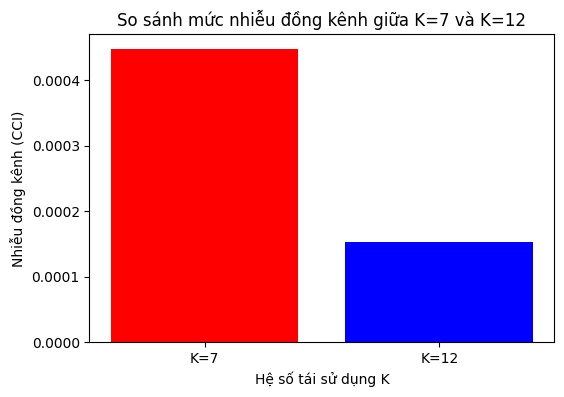

(np.float64(0.00044791579183113566),
 np.float64(6.87386354243376),
 np.float64(0.00015241579027587258),
 np.float64(9.0))

In [2]:
# Hàm tính nhiễu đồng kênh dựa trên khoảng cách D
def co_channel_interference(K, R=1.5, n=4):
    """
    Tính toán mức nhiễu đồng kênh (CCI) dựa trên hệ số tái sử dụng K, bán kính R, và hệ số suy hao n.
    Công thức: CCI = (1 / D^n), với D = sqrt(3K) * R
    """
    D = np.sqrt(3 * K) * R  # Khoảng cách giữa các cell đồng kênh
    CCI = 1 / (D ** n)  # Tính nhiễu đồng kênh
    return CCI, D

# Tính nhiễu cho K=7 và K=12
CCI_K7, D_K7 = co_channel_interference(7)
CCI_K12, D_K12 = co_channel_interference(12)

# Vẽ biểu đồ so sánh nhiễu đồng kênh
plt.figure(figsize=(6, 4))
plt.bar(["K=7", "K=12"], [CCI_K7, CCI_K12], color=['red', 'blue'])
plt.xlabel("Hệ số tái sử dụng K")
plt.ylabel("Nhiễu đồng kênh (CCI)")
plt.title("So sánh mức nhiễu đồng kênh giữa K=7 và K=12")
plt.show()

# Xuất kết quả
CCI_K7, D_K7, CCI_K12, D_K12
